In [0]:
%matplotlib inline


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![](https://pytorch.org/tutorials/_images/cifar10.png)



Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data
6. Loading and normalizing CIFAR10 dataset


By using ``torchvision`` library, it’s extremely easy to load CIFAR10.

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are (PIL Image) images of range [0, 1].
We transform them to Tensors of a new normalized range [-1, 1].

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Plot some of the images



Labels
plane  plane  plane    dog



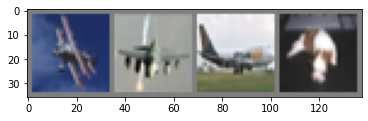

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# plot an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Labels\n'+'  '.join('%5s' % classes[labels[j]] for j in range(4)))


Create a neural network to classify images 


In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

 Define the Loss function and the optimizer.
In this example we use  Cross-Entropy loss and SGD optimizer.




In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Start the training.Images are fed to the network, then the loss is calculated and back-propagated to compute the gradients of all parameters. Finally the optimizer updates the netwotk parameters.



In [7]:

for epoch in range(4):  

    training_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        if i % 2000 == 1999:    
            print('Epoch: %2d, Sample: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, training_loss / 2000))
            training_loss = 0.0

print('Finished Training')

Epoch:  1, Sample:  2000] loss: 2.195
Epoch:  1, Sample:  4000] loss: 1.850
Epoch:  1, Sample:  6000] loss: 1.669
Epoch:  1, Sample:  8000] loss: 1.582
Epoch:  1, Sample: 10000] loss: 1.531
Epoch:  1, Sample: 12000] loss: 1.481
Epoch:  2, Sample:  2000] loss: 1.401
Epoch:  2, Sample:  4000] loss: 1.392
Epoch:  2, Sample:  6000] loss: 1.372
Epoch:  2, Sample:  8000] loss: 1.332
Epoch:  2, Sample: 10000] loss: 1.326
Epoch:  2, Sample: 12000] loss: 1.285
Epoch:  3, Sample:  2000] loss: 1.238
Epoch:  3, Sample:  4000] loss: 1.236
Epoch:  3, Sample:  6000] loss: 1.236
Epoch:  3, Sample:  8000] loss: 1.220
Epoch:  3, Sample: 10000] loss: 1.213
Epoch:  3, Sample: 12000] loss: 1.225
Epoch:  4, Sample:  2000] loss: 1.113
Epoch:  4, Sample:  4000] loss: 1.145
Epoch:  4, Sample:  6000] loss: 1.157
Epoch:  4, Sample:  8000] loss: 1.148
Epoch:  4, Sample: 10000] loss: 1.130
Epoch:  4, Sample: 12000] loss: 1.138


KeyboardInterrupt: ignored


## Test the network on the test data
-------------------------------------


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

GroundTruth:    cat  ship  ship plane


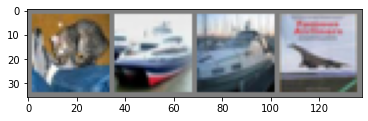

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:


In [0]:

outputs = net(images)

The outputs are activations for the 10 classes.
The higher the activation for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest activation:


In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car  ship


Let test the network on the whole dataset.



In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


Let's calculate per class acuuracy to see how the network performs at each class.



In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 76 %
Accuracy of  bird : 47 %
Accuracy of   cat : 41 %
Accuracy of  deer : 41 %
Accuracy of   dog : 46 %
Accuracy of  frog : 77 %
Accuracy of horse : 53 %
Accuracy of  ship : 75 %
Accuracy of truck : 64 %


## Training on GPU
Just like how you transfer a Tensor on to the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


The rest of this section assumes that `device` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:



    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

    inputs, labels = inputs.to(device), labels.to(device)

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is realllly small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

Training on multiple GPUs
-------------------------
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.

Where do I go next?
-------------------

LINKS TO NEXT LESSONS




